In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_train= pd.read_csv('Dataset\diabetes.csv')
df_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df_train.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
df_train.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
for i in df_train.columns:
    print(df_train[i].value_counts())

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
99     17
100    17
129    14
125    14
106    14
       ..
169     1
61      1
178     1
177     1
199     1
Name: Glucose, Length: 136, dtype: int64
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
82     30
66     30
88     25
84     23
90     22
58     21
86     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
96      4
44      4
110     3
106     3
100     3
98      3
108     2
104     2
46      2
55      2
30      2
95      1
61      1
102     1
38      1
40      1
24      1
114     1
122     1
Name: BloodPressure, dtype: int64
0     227
32     31
30     27
27     23
23     22
18     20
28     20
33     20
31     19
19     18
39     18
29     17
40     16
37     16
22 

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
## As seen earlier there is no null value. However on close inspection we find that null values are filled with '0'

df_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = df_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)    

In [14]:
df_train.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
## to find the median for filling null values

def find_median(var):
    temp = df_train[df_train[var].notnull()]
    temp = df_train[[var,'Outcome']].groupby('Outcome')[[var]].median().reset_index()
    return temp

In [16]:
find_median('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [17]:
## Now we will be filling these values instead of null values

df_train.loc[(df_train['Outcome'] == 0) & (df_train['Insulin'].isnull()), 'Insulin'] = 102.5
df_train.loc[(df_train['Outcome'] == 1) & (df_train['Insulin'].isnull()), 'Insulin'] = 169.5

In [18]:
find_median('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [19]:
## Now we will be filling these values instead of null values

df_train.loc[(df_train['Outcome'] == 0) & (df_train['SkinThickness'].isnull()), 'SkinThickness'] = 27.0
df_train.loc[(df_train['Outcome'] == 1) & (df_train['SkinThickness'].isnull()), 'SkinThickness'] = 32.0

In [20]:
find_median('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [21]:
df_train.loc[(df_train['Outcome'] == 0) & (df_train['BloodPressure'].isnull()), 'BloodPressure'] = 27.0
df_train.loc[(df_train['Outcome'] == 1) & (df_train['BloodPressure'].isnull()), 'BloodPressure'] = 32.0

In [22]:
find_median('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [23]:
df_train.loc[(df_train['Outcome'] == 0) & (df_train['BMI'].isnull()), 'BMI'] = 30.1
df_train.loc[(df_train['Outcome'] == 1) & (df_train['BMI'].isnull()), 'BMI'] = 34.3

In [24]:
find_median('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [25]:
df_train.loc[(df_train['Outcome'] == 0) & (df_train['Glucose'].isnull()) , 'Glucose'] = 107.0
df_train.loc[(df_train['Outcome'] == 1) & (df_train['Glucose'].isnull()) , 'Glucose'] = 140.0

<AxesSubplot:>

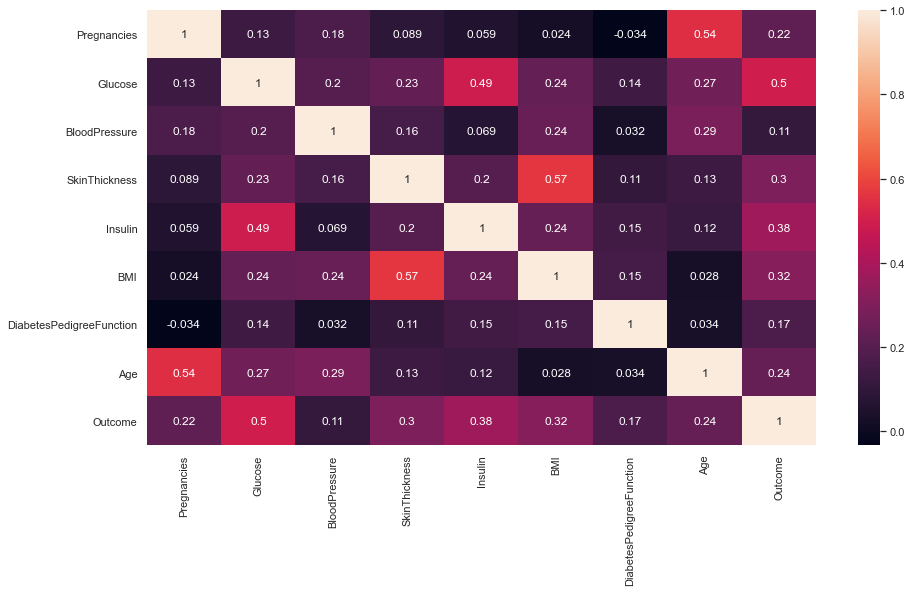

In [26]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_train.corr(),annot=True)

In [27]:
df_train.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.176214,0.089028,0.058767,0.023890,-0.033523,0.544341,0.221898
Glucose,0.130155,1.000000,0.197614,0.229289,0.490015,0.236171,0.138353,0.268910,0.495990
BloodPressure,0.176214,0.197614,1.000000,0.159833,0.069083,0.241341,0.031515,0.288756,0.111448
SkinThickness,0.089028,0.229289,0.159833,1.000000,0.200129,0.566086,0.106280,0.129537,0.295138
Insulin,0.058767,0.490015,0.069083,0.200129,1.000000,0.238443,0.146878,0.123629,0.377081
BMI,0.023890,0.236171,0.241341,0.566086,0.238443,1.000000,0.152771,0.027849,0.315577
DiabetesPedigreeFunction,-0.033523,0.138353,0.031515,0.106280,0.146878,0.152771,1.000000,0.033561,0.173844
Age,0.544341,0.268910,0.288756,0.129537,0.123629,0.027849,0.033561,1.000000,0.238356
Outcome,0.221898,0.495990,0.111448,0.295138,0.377081,0.315577,0.173844,0.238356,1.000000


Outliers

In [28]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               18.0000
SkinThickness                7.0000
Insulin                     67.0000
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


In [29]:
print((df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR)))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False           True    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1  

In [30]:
from sklearn.model_selection import train_test_split
target_col = ['Outcome']

cols = [i for i in df_train.columns if i not in target_col]

#splitting the principal training df_trainset to subtrain and subtest df_trainsets
x_train, x_test, y_train, y_test = train_test_split(df_train[cols], df_train[target_col], 
                                                    test_size = .25, random_state = 111)


In [31]:
from sklearn.utils import resample


# concatenate our training data back together
X = pd.concat([x_train, y_train], axis=1)

# separate minority and majority classes
healthy = X[X.Outcome==0]
diabetic = X[X.Outcome==1]

# upsample minority
diabetic_upsampled = resample(diabetic,
                          replace=True, # sample with replacement
                          n_samples=len(healthy), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([healthy, diabetic_upsampled])

# check new class counts
upsampled.Outcome.value_counts()

0    374
1    374
Name: Outcome, dtype: int64

In [32]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [33]:
y_train

,Outcome
205,0
613,0
277,0
553,0
16,1
...,...
322,1
681,1
275,0
86,0


In [34]:
#ANN
import tensorflow as tf


In [35]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [36]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
modelRFC=RFC.fit(x_train,y_train)

<ipython-input-36-082772501a55>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRFC=RFC.fit(x_train,y_train)


In [37]:

from sklearn.metrics import confusion_matrix,classification_report
predictions = modelRFC.predict(x_test)

print("\nClassification report:\n", classification_report(y_test, predictions))


Classification report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       126
           1       0.80      0.77      0.78        66

    accuracy                           0.85       192
   macro avg       0.84      0.83      0.84       192
weighted avg       0.85      0.85      0.85       192



In [38]:
from lightgbm import LGBMRegressor
# evaluate lightgbm ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
model = LGBMRegressor()

In [39]:
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's l2: 0.0483665	valid_0's l2: 0.104352
[40]	training's l2: 0.0296167	valid_0's l2: 0.104469
[60]	training's l2: 0.0204734	valid_0's l2: 0.107551
[80]	training's l2: 0.0147218	valid_0's l2: 0.110785
[100]	training's l2: 0.010748	valid_0's l2: 0.11392


C:\Users\WARRIOR\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMRegressor()

In [40]:
predictions = model.predict(x_test)
predictions=(predictions>0.5)
print("\nClassification report:\n", classification_report(y_test, predictions))


Classification report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       126
           1       0.80      0.74      0.77        66

    accuracy                           0.85       192
   macro avg       0.84      0.82      0.83       192
weighted avg       0.85      0.85      0.85       192



In [41]:
import pickle
pickle.dump(model, open('modelRFC.sav', 'wb'))

In [1]:
import json
import os
from werkzeug.utils import secure_filename
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from flask import Flask, render_template, session, request, flash, redirect
import flask
import cv2
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.preprocessing import StandardScaler
import sklearn.externals
import joblib
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import joblib

import numpy as np

Model  = pickle.load(open(r'E:\Projects2021\Diabetes\modelRFC.sav', 'rb'))


def model_predict(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age, model):
    x_train=[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]
    x_train=np.array(x_train)
    x_train=np.reshape(x_train,(-1,8))
    df=pd.DataFrame(x_train,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'] )
    # df=preprocess(df)
    preds = model.predict(df)
    #preds = np.argmax(preds, axis=1)
   
   

   
    if preds[0] == 0:
        pred = "No diabetic"
    else :
        pred = "diabetic"
   

    return pred





In [3]:
predict=model_predict(1,126,60,0,0,30.1,0.349,47,Model)

In [4]:
predict

'diabetic'